# 1. Importing pandas, matplotlib and numpy packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw_data = pd.read_csv("data/data.csv", names=["sex", "length [mm]", "diameter [mm]", "height [mm]", 
                                               "whole weight [g]", "shucked weight [g]", "viscera weight [g]", 
                                               "shell weight [g]", "rings"])
raw_data

,sex,length [mm],diameter [mm],height [mm],whole weight [g],shucked weight [g],viscera weight [g],shell weight [g],rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## 2. Creating table for storing calculated data (initialized with zeros)

In [3]:
# sex_count_table = pd.DataFrame(data={
#     "": ["Male", "Infant", "Female"],
#     "Count": [0., 0., 0.],
#     "%": [0., 0., 0.]
# })

sex_count_table = pd.DataFrame(columns=["Count", "%"], index=["Male", "Infants", "Female"])
sex_count_table

,Count,%
Male,NaN,NaN
Infants,NaN,NaN
Female,NaN,NaN


## 2.2. Calculating quantity of males, infants and females over all dataset and their percentage to whole population

* ```raw_data.iterrows()``` - returns an iterator which iterates over all rows in dataset (raw_data) -> from there we can access all columns for specific row

we also specified ```all_entries``` variable to calculate percentages

In [4]:
all_entries = len(raw_data)
males = 0
infants = 0
females = 0
for row in raw_data.iterrows():
    # print(row[1]["sex"])
    if row[1]["sex"] == "M":
        males += 1
    elif row[1]["sex"] == "I":
        infants += 1
    else:
        females += 1

## 2.3. Populating table defined at 2.1 with calculated values
also calculating percentages as follows:
$$percentage = F\left(\frac{q}{a} \cdot 100\% \right)$$
where $q$ - respective quantity [males, infants or females], $a$ - all entries in our data, $F$ - function that rounds to two decimal places

In [5]:
# Adding values to count column
sex_count_table["Count"]["Male"] = males
sex_count_table["Count"]["Infants"] = infants
sex_count_table["Count"]["Female"] = females

# Adding values to % column
sex_count_table["%"]["Male"] = round((males / all_entries) * 100, 2)
sex_count_table["%"]["Infants"] = round((infants / all_entries) * 100, 2)
sex_count_table["%"]["Female"] = round((females / all_entries) * 100, 2)

In [6]:
# printing the table
sex_count_table

,Count,%
Male,1528,36.58
Infants,1342,32.13
Female,1307,31.29


# =====================================================

## 3. Creating a blank table for containing summary statistics for the quantitative variables

In [7]:
summary_stat_table = pd.DataFrame(columns=["mean", "std", "min", "25%", "50%", "75%", "max"],
                                  index=["length [mm]", "diameter [mm]", "height [mm]", 
                                         "whole weight [g]", "shucked weight [g]", "viscera weight [g]", 
                                         "shell weight [g]", "rings"])

summary_stat_table

,mean,std,min,25%,50%,75%,max
length [mm],NaN,NaN,NaN,NaN,NaN,NaN,NaN
diameter [mm],NaN,NaN,NaN,NaN,NaN,NaN,NaN
height [mm],NaN,NaN,NaN,NaN,NaN,NaN,NaN
whole weight [g],NaN,NaN,NaN,NaN,NaN,NaN,NaN
shucked weight [g],NaN,NaN,NaN,NaN,NaN,NaN,NaN
viscera weight [g],NaN,NaN,NaN,NaN,NaN,NaN,NaN
shell weight [g],NaN,NaN,NaN,NaN,NaN,NaN,NaN
rings,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.1 Calculating and inserting values to dataframe created above in 3
* ```row[1]["mean"] = np.mean(raw_data[row[0]])``` where row[1] points to the column values in the raw_data and row[0] to it's name
* ```raw_data[row[0]].quantile([0.25, 0.5, 0.75])``` returns pandas Series object with desired quantiles [0.25, 0.50, 0.75]

In [8]:
for row in summary_stat_table.iterrows():
    row[1]["mean"] = np.mean(raw_data[row[0]])
    row[1]["std"] = np.std(raw_data[row[0]])
    row[1]["min"] = np.min(raw_data[row[0]])
    quantiles = raw_data[row[0]].quantile([0.25, 0.5, 0.75])
    row[1]["25%"] = quantiles[0.25]
    row[1]["50%"] = quantiles[0.50]
    row[1]["75%"] = quantiles[0.75]
    row[1]["max"] = np.max(raw_data[row[0]])

summary_stat_table

,mean,std,min,25%,50%,75%,max
length [mm],0.523992,0.120079,0.075,0.45,0.545,0.615,0.815
diameter [mm],0.407881,0.099228,0.055,0.35,0.425,0.48,0.65
height [mm],0.139516,0.041822,0.0,0.115,0.14,0.165,1.13
whole weight [g],0.828742,0.49033,0.002,0.4415,0.7995,1.153,2.8255
shucked weight [g],0.359367,0.221936,0.001,0.186,0.336,0.502,1.488
viscera weight [g],0.180594,0.109601,0.0005,0.0935,0.171,0.253,0.76
shell weight [g],0.238831,0.139186,0.0015,0.13,0.234,0.329,1.005
rings,9.933684,3.223783,1,8.0,9.0,11.0,29


# 4. Charts

In [9]:
# raw_data["length [mm]"].unique()
# printing number of unique occurrences
for column in raw_data.columns[1:-1]:
    print(column, len(raw_data[column].unique()))

length [mm] 134
diameter [mm] 111
height [mm] 51
whole weight [g] 2429
shucked weight [g] 1515
viscera weight [g] 880
shell weight [g] 926


## 4.1 Creating the chart for the Sex column from dataset

Text(Females, 1307, '1307')

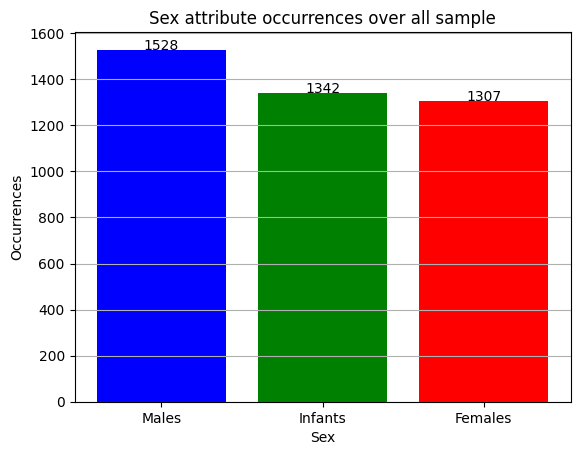

In [10]:
sex = dict(raw_data["sex"].value_counts())

# length = dict(sorted(length.items(), key=lambda x: x[0]))
# length
fig, ax = plt.subplots()
ax.yaxis.grid()
ax.set_title("Sex attribute occurrences over all sample")
ax.set_ylabel("Occurrences")
ax.set_xlabel("Sex")

y_values = list(sex.values())

ax.bar(["Males", "Infants", "Females"], y_values, color=["b", "g", "r"])
ax.text("Males", y_values[0], y_values[0], ha = 'center')
ax.text("Infants", y_values[1], y_values[1], ha = 'center')
ax.text("Females", y_values[2], y_values[2], ha = 'center')

## 4.2 Creating histograms for rest of the columns (2x4 grid)

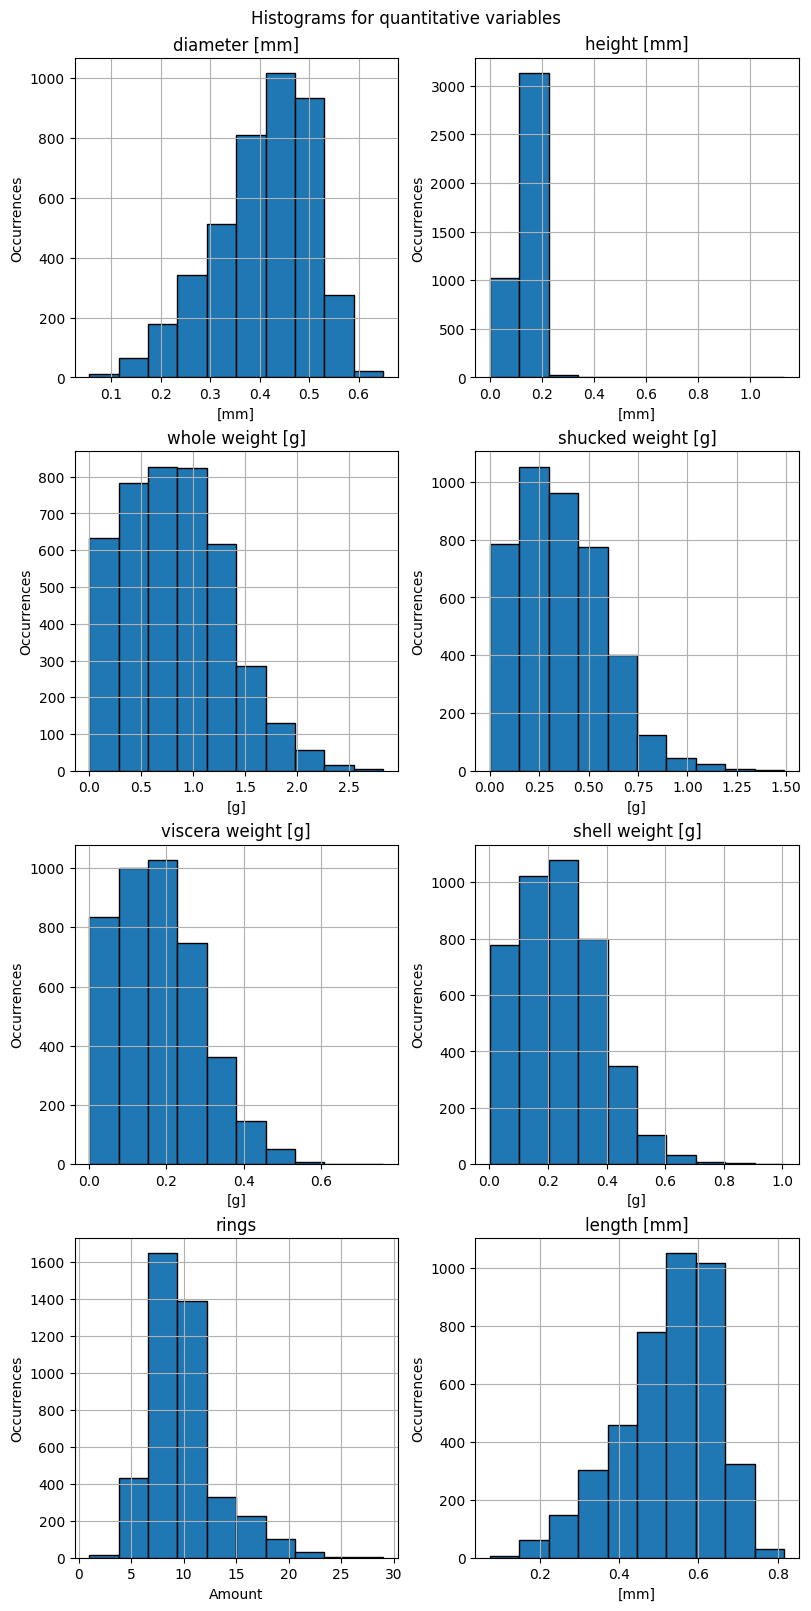

In [11]:
# length = raw_data["length [mm]"].value_counts()
# length
fig, axes = plt.subplots(4, 2, constrained_layout=True)
fig.set_size_inches(8, 16)
# fig.tight_layout(pad=4.5)
fig.suptitle("Histograms for quantitative variables")
# raw_data["length [mm]"].hist(ax=axes[0, 0])
for i, column in enumerate(list(raw_data)[1:]):
    row = (i-1) // 2
    col = (i-1) % 2
    raw_data[column].hist(ax=axes[row, col], edgecolor="#000000")
    axes[row, col].set_title(column)
    axes[row, col].set_ylabel("Occurrences")
    if "[" in column:
        axes[row, col].set_xlabel("[" + column.split("[")[1])
    else:
        axes[row, col].set_xlabel("Amount")
        
    

## 4.3 Creating scatter plots for all quantitative variables (2x14 grid)

### Calculating how much charts we'll have can be done with following formula describing combinations without repetitions
$$C(n, p) = \frac{n!}{(p!(n - p)!)}$$
where $n$ is number of available variables, $p$ is number of variables that we choose to correlate

In our case it is $n=8$ because we have 8 quantitative variables, and $p=2$ because we correlate 2 variables - one for each x, y axis
$$C(8, 2) = \frac{8!}{2!(8-2)!} = \frac{8!}{2!(6!)} = 28$$


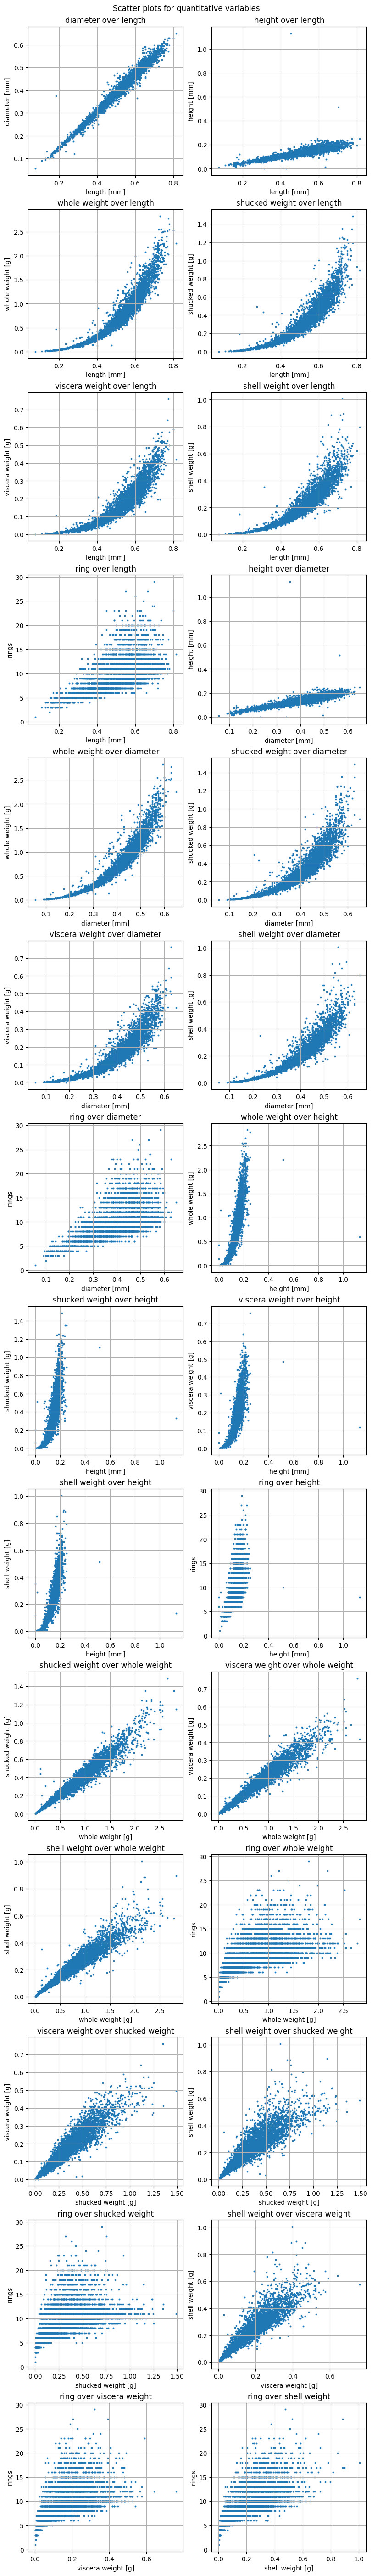

In [12]:
# fig, ax = plt.subplots()
# ax.scatter(raw_data["length [mm]"], raw_data["shell weight [g]"], s=3)

# Creating figure with subplots in 14x2 grid
fig, axes = plt.subplots(14, 2, constrained_layout=True)
# Setting size of figure
fig.set_size_inches(8, 56)
# Also title of whole figure
fig.suptitle("Scatter plots for quantitative variables")
# Getting column names from raw_data dataframe without sex column
column_names = list(raw_data)[1:]

iteration = 0
for x in range(7):
    for y in range(x, 8):
        if x == y:
            continue
        row = iteration // 2
        col = iteration % 2
        
        axes[row, col].scatter(raw_data[column_names[x]],
                           raw_data[column_names[y]], s=3)
        axes[row, col].grid()
        axes[row, col].set_xlabel(column_names[x])
        axes[row, col].set_ylabel(column_names[y])
        axes[row, col].set_title(column_names[y].split("[")[0][:-1] + " over " + 
                                 column_names[x].split("[")[0][:-1])
        
        iter += 1
        

# 5. Creating correlation matrix of all quantitative variables 

In [13]:
corr_df = raw_data.corr(numeric_only=True)
corr_df

,length [mm],diameter [mm],height [mm],whole weight [g],shucked weight [g],viscera weight [g],shell weight [g],rings
length [mm],1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter [mm],0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height [mm],0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight [g],0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight [g],0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight [g],0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight [g],0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# 6.1 Creating heatmap of above correlation matrix using seaborn package

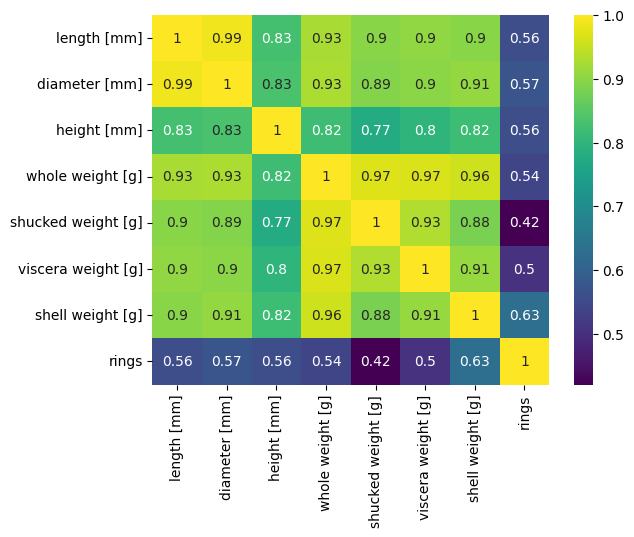

In [22]:
import seaborn as sn

# Setting annot to True gives labels for each square, and cmap changes colors
sn.heatmap(data=corr_df, annot=True, cmap="viridis")
plt.show()

# 6.1 Creating linear regression plot for two most linearly related quantitative variables: length and diameter

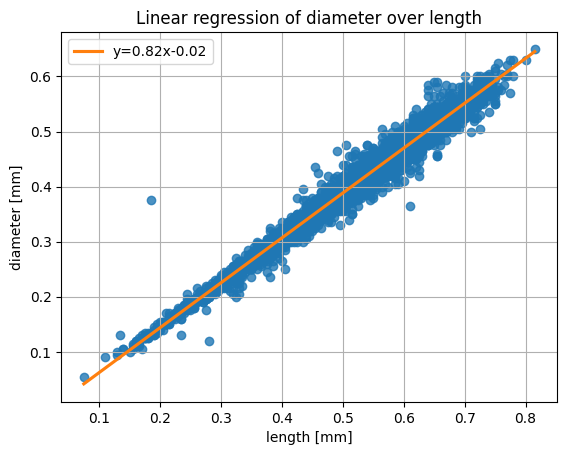

In [30]:
import scipy as sp

# Getting line coefficients for labeling slope on plot 
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(raw_data["length [mm]"], raw_data["diameter [mm]"])
sn.regplot(data=raw_data, x="length [mm]", y="diameter [mm]", 
           line_kws={"color": "C1", 'label':f"y={slope:.2f}x{intercept:.2f}"})
plt.grid()
plt.title("Linear regression of diameter over length")
plt.legend()
plt.show()

# 7.1 Creating table for summary statistics for the quantitative variables in the dataset split by the categories of the qualitative variable

In [77]:
summary_stat_categories_table = pd.DataFrame(columns=["Feature", "Sex", "mean", "std", "min", "25%", "50%", "75%", "max"])
column_names = list(raw_data)[1:]
feature_col = []
sex_col = ["Female", "Infant", "Male"] * len(column_names)
for column in column_names:
    for _ in range(3):
        feature_col.append(column)
summary_stat_categories_table["Feature"] = feature_col
summary_stat_categories_table["Sex"] = sex_col

# test = pd.read_excel("Zeszyt1.xlsx")
summary_stat_categories_table

,Feature,Sex,mean,std,min,25%,50%,75%,max
0,length [mm],Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,length [mm],Infant,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,length [mm],Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,diameter [mm],Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,diameter [mm],Infant,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,diameter [mm],Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,height [mm],Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,height [mm],Infant,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,height [mm],Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,whole weight [g],Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 7.2 Calculating all values to populate table created above

In [78]:
male_raw_data = raw_data.loc[(raw_data["sex"] == "M"), :]
female_raw_data = raw_data.loc[(raw_data["sex"] == "F"), :]
infant_raw_data = raw_data.loc[(raw_data["sex"] == "I"), :]

column_names = list(raw_data)[1:]
for i, column in enumerate(column_names):
    # Mean
    summary_stat_categories_table["mean"][0+3*i] = female_raw_data[column].mean()
    summary_stat_categories_table["mean"][1+3*i] = infant_raw_data[column].mean()
    summary_stat_categories_table["mean"][2+3*i] = male_raw_data[column].mean()
    
    # Std
    summary_stat_categories_table["std"][0+3*i] = female_raw_data[column].std()
    summary_stat_categories_table["std"][1+3*i] = infant_raw_data[column].std()
    summary_stat_categories_table["std"][2+3*i] = male_raw_data[column].std()
    
    # Min
    summary_stat_categories_table["min"][0+3*i] = female_raw_data[column].min()
    summary_stat_categories_table["min"][1+3*i] = infant_raw_data[column].min()
    summary_stat_categories_table["min"][2+3*i] = male_raw_data[column].min()
    
    quantiles_female = female_raw_data[column].quantile([0.25, 0.5, 0.75])
    quantiles_infant = infant_raw_data[column].quantile([0.25, 0.5, 0.75])
    quantiles_male = male_raw_data[column].quantile([0.25, 0.5, 0.75])
    
    # Quantile 25
    summary_stat_categories_table["25%"][0+3*i] = quantiles_female[0.25]
    summary_stat_categories_table["25%"][1+3*i] = quantiles_infant[0.25]
    summary_stat_categories_table["25%"][2+3*i] = quantiles_male[0.25]
    
    # Quantile 50, median
    summary_stat_categories_table["50%"][0+3*i] = quantiles_female[0.50]
    summary_stat_categories_table["50%"][1+3*i] = quantiles_infant[0.50]
    summary_stat_categories_table["50%"][2+3*i] = quantiles_male[0.50]
    
    # Quantile 75
    summary_stat_categories_table["75%"][0+3*i] = quantiles_female[0.75]
    summary_stat_categories_table["75%"][1+3*i] = quantiles_infant[0.75]
    summary_stat_categories_table["75%"][2+3*i] = quantiles_male[0.75]
    
    # Max
    summary_stat_categories_table["max"][0+3*i] = female_raw_data[column].max()
    summary_stat_categories_table["max"][1+3*i] = infant_raw_data[column].max()
    summary_stat_categories_table["max"][2+3*i] = male_raw_data[column].max()
    
summary_stat_categories_table

,Feature,Sex,mean,std,min,25%,50%,75%,max
0,length [mm],Female,0.579093,0.08616,0.275,0.525,0.59,0.64,0.815
1,length [mm],Infant,0.427746,0.108858,0.075,0.36,0.435,0.51,0.725
2,length [mm],Male,0.561391,0.102697,0.155,0.505,0.58,0.63,0.78
3,diameter [mm],Female,0.454732,0.070954,0.195,0.41,0.465,0.505,0.65
4,diameter [mm],Infant,0.326494,0.088109,0.055,0.27,0.335,0.39,0.55
5,diameter [mm],Male,0.439287,0.084398,0.11,0.395,0.455,0.5,0.63
6,height [mm],Female,0.158011,0.039984,0.015,0.14,0.16,0.175,1.13
7,height [mm],Infant,0.107996,0.031995,0.0,0.085,0.11,0.13,0.22
8,height [mm],Male,0.151381,0.034804,0.025,0.13,0.155,0.175,0.515
9,whole weight [g],Female,1.046532,0.430316,0.08,0.73,1.0385,1.32025,2.657


# 7.3 Creating boxplots for quantitative variables

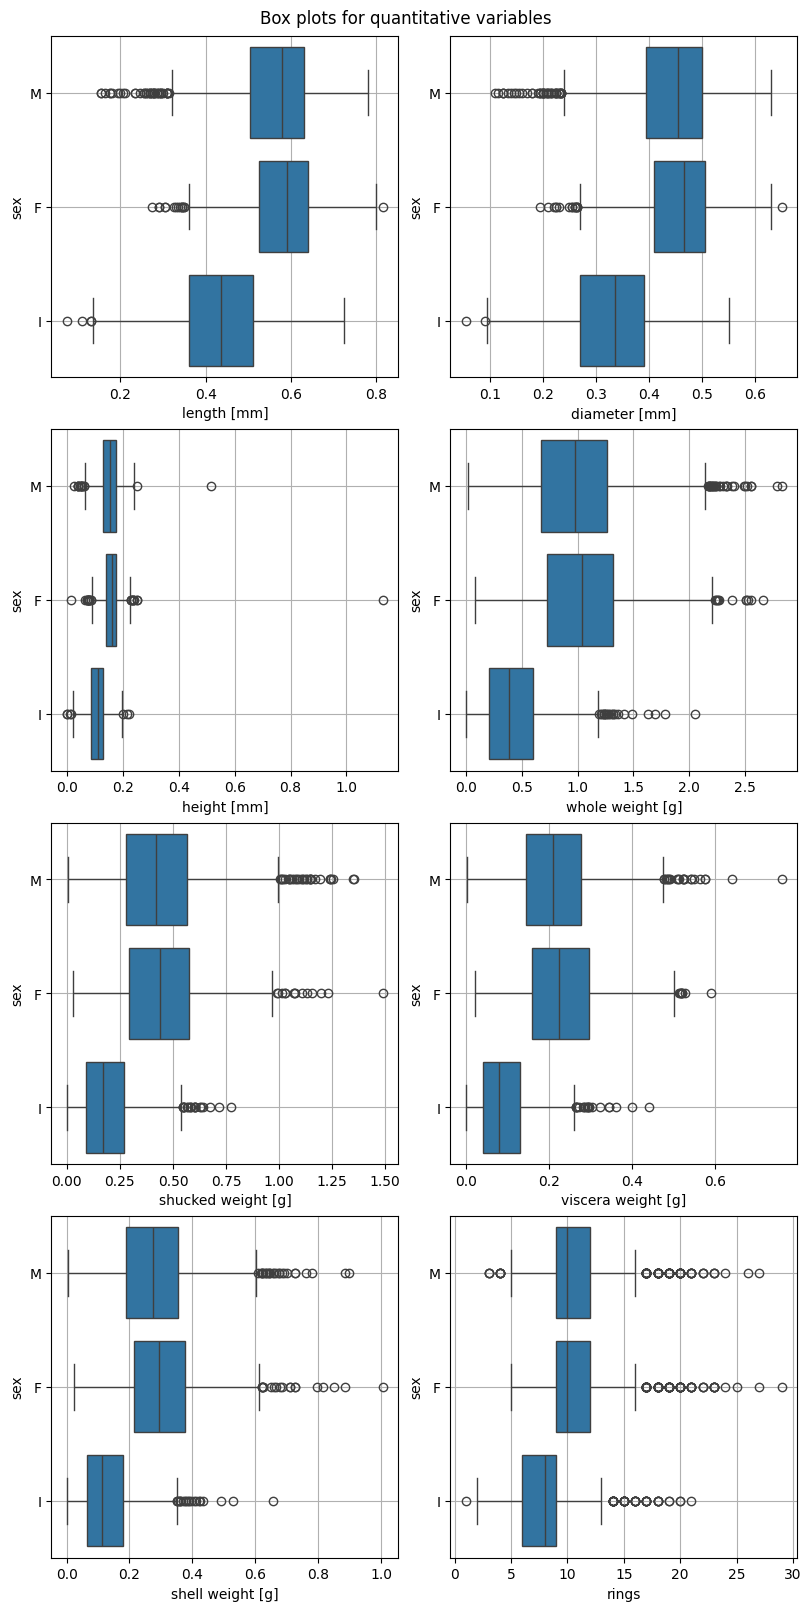

In [98]:
fig, axes = plt.subplots(4, 2, constrained_layout=True)
# Setting size of figure
fig.set_size_inches(8, 16)
# Also title of whole figure
fig.suptitle("Box plots for quantitative variables")

column_names = list(raw_data)[1:]
for i, column in enumerate(column_names):
    row = i // 2
    col = i % 2
    sn.boxplot(data=raw_data, y="sex", x=column, ax=axes[row, col])
    axes[row, col].grid()
# summary_stat_categories_table.loc[summary_stat_categories_table["Feature"] == "length [mm]"]